# 1. Gender Classification Using Convolutional Neural Network (CNN)

## 1.1 Necessary libraries

In [122]:
import pandas as pd                       # structures and data analysis
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import plot_confusion_matrix


## 1.2 Download the dataset

In [287]:
import requests
url = "https://data.brasil.io/dataset/genero-nomes/nomes.csv.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)

df = pd.read_csv('nomes.csv.gz') 
df.head()

,alternative_names,classification,first_name,frequency_female,frequency_male,frequency_total,frequency_group,group_name,ratio
0,AILINE|ALEINE|ALIINE|ALINE|ALINER|ALINHE|ALINN...,F,AALINE,66.0,NaN,66,530550,ALINE,1.0
1,ARAAO|ARAO,M,AARAO,NaN,281.0,281,3526,ARAO,1.0
2,AHARON|AROM|ARON|ARYON|HARON,M,AARON,NaN,676.0,676,3442,ARON,1.0
3,ADA|ADAH|ADAR|ADHA|HADA,F,ABA,82.0,NaN,82,5583,ADA,1.0
4,NaN,M,ABADE,NaN,57.0,57,57,ABADE,1.0


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100787 entries, 0 to 100786
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   alternative_names  70745 non-null   object 
 1   classification     100787 non-null  object 
 2   first_name         100787 non-null  object 
 3   frequency_female   60484 non-null   float64
 4   frequency_male     50932 non-null   float64
 5   frequency_total    100787 non-null  int64  
 6   frequency_group    100787 non-null  int64  
 7   group_name         100787 non-null  object 
 8   ratio              100787 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.9+ MB


In [289]:
df.describe()

,frequency_female,frequency_male,frequency_total,frequency_group,ratio
count,6.048400e+04,5.093200e+04,1.007870e+05,1.007870e+05,100787.000000
mean,1.529848e+03,1.740660e+03,1.797718e+03,1.766752e+04,0.981382
std,5.116376e+04,3.856265e+04,4.837138e+04,1.783261e+05,0.076555
min,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,0.500000
25%,3.200000e+01,3.200000e+01,3.300000e+01,8.900000e+01,1.000000
50%,6.300000e+01,6.200000e+01,6.700000e+01,3.520000e+02,1.000000
75%,1.790000e+02,1.770000e+02,1.970000e+02,2.254000e+03,1.000000
max,1.169474e+07,5.732508e+06,1.173413e+07,1.174166e+07,1.000000


### 1.2.1 Preparing the data 

In [290]:
y = df['classification'].astype("category").cat.codes.values # y labels into numbers
texts = df['first_name'].values # input names

## 1.3 Encoding Words

Neural networks can only learn to find patterns in numerical data, so it is necessary to convert our data into numeric values with word encoding or tokenization. 

In [292]:
tokenizer  = Tokenizer(num_words = len(y))
tokenizer.fit_on_texts(texts)
sequences =  tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("unique words : {}".format(len(word_index)))
print(word_index)

maxlen=10
data = pad_sequences(sequences, maxlen, padding='post')
print('Shape of data tensor:', data.shape)
print('Shape of Label:', y.shape)

unique words : 100787
{'aaline': 1, 'aarao': 2, 'aaron': 3, 'aba': 4, 'abade': 5, 'abadi': 6, 'abadia': 7, 'abadias': 8, 'abadio': 9, 'abaete': 10, 'abd': 11, 'abda': 12, 'abdal': 13, 'abdala': 14, 'abdalla': 15, 'abdallah': 16, 'abdao': 17, 'abde': 18, 'abdeel': 19, 'abdel': 20, 'abdenago': 21, 'abdenego': 22, 'abdenico': 23, 'abdenigo': 24, 'abdenio': 25, 'abdenor': 26, 'abder': 27, 'abderman': 28, 'abdi': 29, 'abdia': 30, 'abdias': 31, 'abdiel': 32, 'abdisio': 33, 'abdnego': 34, 'abdo': 35, 'abdom': 36, 'abdon': 37, 'abdoral': 38, 'abdu': 39, 'abdul': 40, 'abe': 41, 'abecio': 42, 'abedenego': 43, 'abedias': 44, 'abediel': 45, 'abednego': 46, 'abedon': 47, 'abegail': 48, 'abegair': 49, 'abeilard': 50, 'abeildo': 51, 'abeilton': 52, 'abel': 53, 'abela': 54, 'abelar': 55, 'abelard': 56, 'abelarda': 57, 'abelardo': 58, 'abeli': 59, 'abelice': 60, 'abelicia': 61, 'abelina': 62, 'abelino': 63, 'abelio': 64, 'abelirio': 65, 'abelita': 66, 'abelmar': 67, 'abelo': 68, 'abelor': 69, 'abelson'

## 1.4 Split the data into test and train

In [293]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=28) # Segment the data

## 1.5 Building the CNN Model

In [296]:
# initilaizing the Sequential nature for CNN model
model = Sequential()  
# Embedding layer
model.add(Embedding(100787, 32, input_length=maxlen, trainable=True))
# 32 convolution filters used each of size 3
model.add(Conv1D(32, 3, activation='relu'))
# 64 convolution filters used each of size 4
model.add(Conv1D(64, 5, activation='relu'))
# choose the best features via pooling
model.add(MaxPooling1D(pool_size=(2,)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten we only want a classification output
#model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(150, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output 
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print the model
model.summary() 

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_81 (Embedding)     (None, 10, 32)            3225184   
_________________________________________________________________
conv1d_158 (Conv1D)          (None, 8, 32)             3104      
_________________________________________________________________
conv1d_159 (Conv1D)          (None, 4, 64)             10304     
_________________________________________________________________
max_pooling1d_69 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
dense_106 (Dense)            (None, 2, 150)            9750      
_________________________________________________________________
dropout_53 (Dropout)         (None, 2, 150)          

## 1.6 Fitting the data into model

In [297]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),  epochs=10, batch_size=32) # Getting score metrics
scores = model.evaluate(x_test, y_test) 
y_pred = model.predict((x_test))
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
630/630 [==============================] - 24s 37ms/step - loss: 0.6891 - accuracy: 0.5466 - val_loss: 0.6885 - val_accuracy: 0.5484
Epoch 2/10
630/630 [==============================] - 23s 36ms/step - loss: 0.6382 - accuracy: 0.5975 - val_loss: 0.7725 - val_accuracy: 0.5153
Epoch 3/10
630/630 [==============================] - 24s 38ms/step - loss: 0.3567 - accuracy: 0.7679 - val_loss: 1.0745 - val_accuracy: 0.5326
Epoch 4/10
630/630 [==============================] - 23s 37ms/step - loss: 0.3448 - accuracy: 0.7736 - val_loss: 1.3470 - val_accuracy: 0.5329
Epoch 5/10
630/630 [==============================] - 23s 37ms/step - loss: 0.3445 - accuracy: 0.7742 - val_loss: 1.3505 - val_accuracy: 0.5270
Epoch 6/10
630/630 [==============================] - 23s 37ms/step - loss: 0.3440 - accuracy: 0.7759 - val_loss: 1.5577 - val_accuracy: 0.5269
Epoch 7/10
630/630 [==============================] - 23s 37ms/step - loss: 0.3444 - accuracy: 0.7739 - val_loss: 1.5253 - val_accuracy:

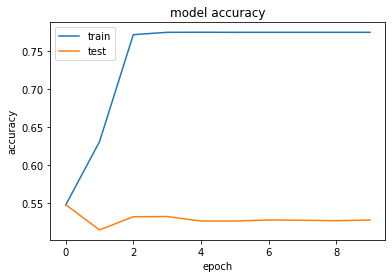

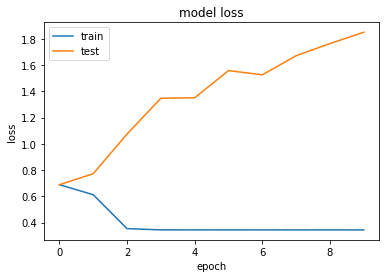

In [298]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


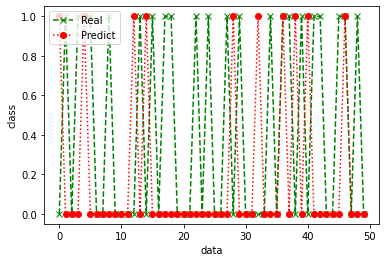

In [300]:
y_pred = model.predict_classes(x_test).flatten()
plt.figure(2)
plt.plot(y_test[0:50], 'g--x')
plt.plot(y_pred[0:50], 'r:o')
plt.ylabel('class')
plt.xlabel('data')
plt.legend(['Real', 'Predict'], loc='upper left')
plt.show()